# Sales Forecasting - Data Preparation

This notebook prepares the data for forecasting by cleaning and engineering features.

## Objectives
- Clean and preprocess data
- Create time-based features
- Generate lag and rolling features
- Add seasonality indicators
- Save processed data

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import warnings
warnings.filterwarnings('ignore')

# Add src to path
current_dir = os.getcwd()
src_path = os.path.abspath(os.path.join(current_dir, '..', 'src'))
if src_path not in sys.path:
    sys.path.append(src_path)
# Also check if running from root
if os.path.exists('src') and os.path.abspath('src') not in sys.path:
    sys.path.append(os.path.abspath('src'))

# Import custom modules
try:
    from data_preprocessing import (
        load_data, handle_missing_values, 
        prepare_time_series_data
    )
    from feature_engineering import create_all_features
except ImportError as e:
    print(f'Error importing custom modules: {e}')
    print(f'sys.path: {sys.path}')
    # Try alternative path logic if needed
    sys.path.append(os.path.abspath(os.path.join(current_dir, 'src')))
    from data_preprocessing import (
        load_data, handle_missing_values, 
        prepare_time_series_data
    )
    from feature_engineering import create_all_features

print('✅ Libraries imported successfully')

✅ Libraries imported successfully


## 1. Load Data

In [4]:
# Load dataset
df = load_data('../data/processed/Sample - Superstore.csv')
df.head()

✅ Successfully loaded data: 9994 rows, 21 columns


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## 2. Data Cleaning

In [5]:
# Handle missing values
df_clean = handle_missing_values(df)

# Remove any negative sales (if present)
df_clean = df_clean[df_clean['Sales'] > 0]

print(f'\n✅ Cleaned data shape: {df_clean.shape}')


------------------------------------------------------------
HANDLING MISSING VALUES
------------------------------------------------------------
✅ No missing values found

✅ Cleaned data shape: (9994, 21)


## 3. Prepare Time Series Data

Aggregate sales by day and prepare for forecasting.

In [6]:
# Prepare daily time series
daily_sales = prepare_time_series_data(
    df_clean, 
    date_column='Order Date',
    value_column='Sales',
    freq='D'  # Daily frequency
)

# Display
print('\nDaily Sales Time Series:')
print(daily_sales.head())
print(f'\nShape: {daily_sales.shape}')


------------------------------------------------------------
PREPARING TIME SERIES DATA
------------------------------------------------------------
✅ Prepared time series data:
   Date range: 2014-01-03 00:00:00 to 2017-12-30 00:00:00
   Frequency: D
   Total periods: 1458

Daily Sales Time Series:
               Sales
Order Date          
2014-01-03    16.448
2014-01-04   288.060
2014-01-05    19.536
2014-01-06  4407.100
2014-01-07    87.158

Shape: (1458, 1)


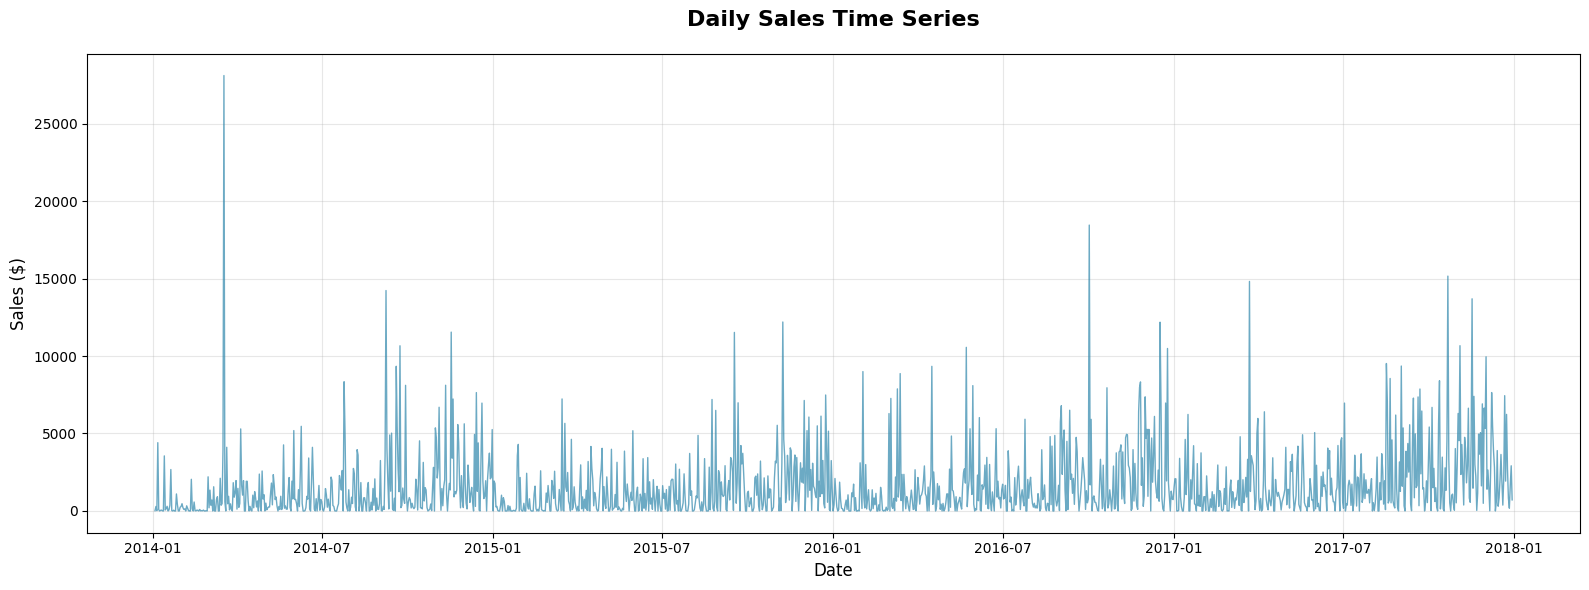

In [7]:
# Visualize daily sales
plt.figure(figsize=(16, 6))
plt.plot(daily_sales.index, daily_sales['Sales'], linewidth=1, color='#2E86AB', alpha=0.7)
plt.title('Daily Sales Time Series', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 4. Feature Engineering

Create comprehensive features for ML models.

In [8]:
# Create all features
df_features = create_all_features(
    daily_sales,
    target_column='Sales',
    lag_periods=[1, 7, 14, 30],  # Previous day, week, 2 weeks, month
    rolling_windows=[7, 14, 30]  # 1 week, 2 weeks, 1 month windows
)

print('\nFeatures created:')
print(df_features.columns.tolist())
print(f'\nFinal shape: {df_features.shape}')


Features created:
['Order Date', 'Sales', 'year', 'month', 'day', 'dayofweek', 'quarter', 'is_month_start', 'is_month_end', 'month_sin', 'month_cos', 'day_sin', 'day_cos', 'lag_1', 'lag_7', 'lag_14', 'lag_30', 'rolling_mean_7', 'rolling_std_7', 'rolling_mean_14', 'rolling_std_14', 'rolling_mean_30', 'rolling_std_30']

Final shape: (1428, 23)


In [9]:
# Display sample of features
df_features.head(10)

,Order Date,Sales,year,month,day,dayofweek,quarter,is_month_start,is_month_end,month_sin,...,lag_1,lag_7,lag_14,lag_30,rolling_mean_7,rolling_std_7,rolling_mean_14,rolling_std_14,rolling_mean_30,rolling_std_30
30,2014-02-02,211.646,2014,2,2,6,1,0,0,0.866025,...,468.900,1097.250,378.594,16.448,234.615714,184.272985,391.764143,723.061683,496.699767,1082.072772
31,2014-02-03,97.112,2014,2,3,0,1,0,0,0.866025,...,211.646,426.670,2673.870,288.060,187.536000,168.446888,207.710000,303.971952,490.334833,1083.902392
32,2014-02-04,134.384,2014,2,4,1,1,0,0,0.866025,...,97.112,3.928,25.248,19.536,206.172571,151.067374,215.505429,300.310080,494.163100,1082.383979
33,2014-02-05,0.000,2014,2,5,2,1,0,0,0.866025,...,134.384,0.000,0.000,4407.100,206.172571,151.067374,215.505429,300.310080,347.259767,793.525559
34,2014-02-06,330.512,2014,2,6,3,1,0,0,0.866025,...,0.000,240.500,46.020,87.158,219.031429,158.141592,235.826286,297.572222,355.371567,792.017396
35,2014-02-07,180.320,2014,2,7,4,1,0,0,0.866025,...,330.512,290.666,0.000,0.000,203.267714,155.284780,248.706286,290.395532,361.382233,789.908885
36,2014-02-08,14.560,2014,2,8,5,1,0,0,0.866025,...,180.320,468.900,0.000,40.544,138.362000,115.643854,249.746286,289.460888,360.516100,790.286970
37,2014-02-09,0.000,2014,2,9,6,1,0,0,0.866025,...,14.560,211.646,1097.250,54.830,108.126857,120.841051,171.371286,163.460784,358.688433,791.081298
38,2014-02-10,0.000,2014,2,10,0,1,0,0,0.866025,...,0.000,97.112,426.670,9.940,94.253714,127.696384,140.894857,151.540771,358.357100,791.234470
39,2014-02-11,2043.400,2014,2,11,1,1,0,0,0.866025,...,0.000,134.384,3.928,0.000,366.970286,749.975411,286.571429,526.395762,426.470433,845.419190


## 5. Feature Correlation Analysis

Top 15 Features Correlated with Sales:
Sales              1.000000
rolling_mean_7     0.461037
rolling_std_7      0.403885
rolling_mean_14    0.389191
rolling_std_14     0.329459
rolling_mean_30    0.314139
month              0.254493
rolling_std_30     0.251315
quarter            0.223485
lag_7              0.188338
Order Date         0.171513
lag_14             0.147339
month_cos          0.141086
lag_1              0.125528
year               0.110220
Name: Sales, dtype: float64


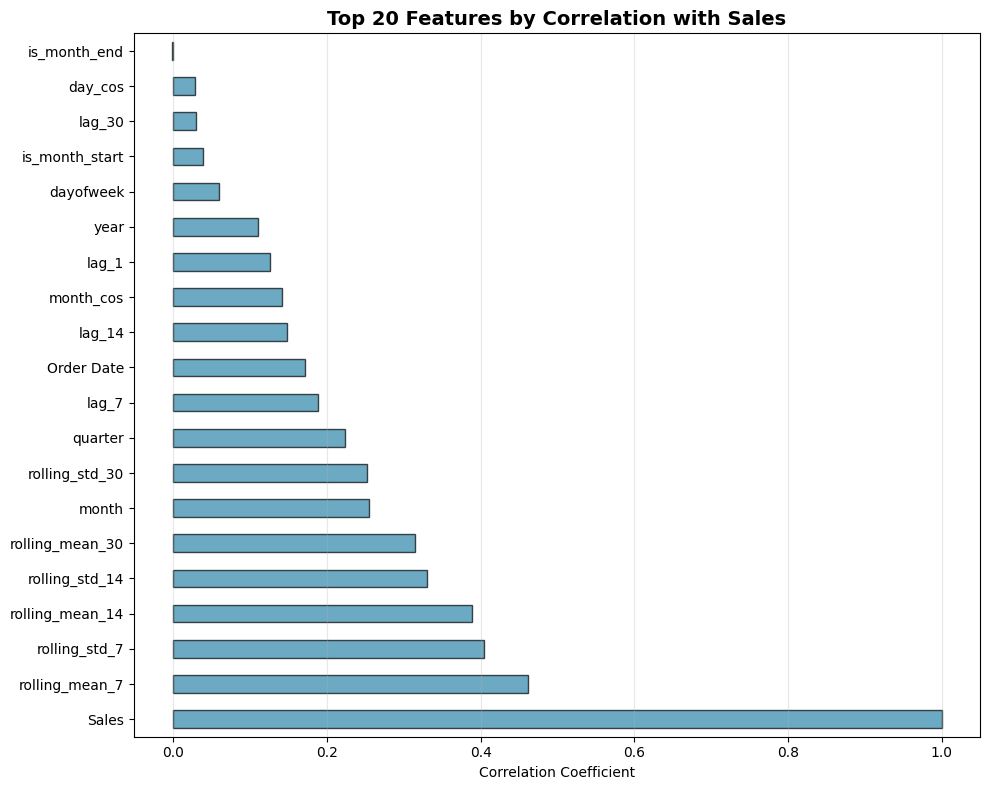

In [10]:
# Calculate correlation with target
correlations = df_features.corr()['Sales'].sort_values(ascending=False)

print('Top 15 Features Correlated with Sales:')
print(correlations.head(15))

# Visualize
plt.figure(figsize=(10, 8))
correlations.head(20).plot(kind='barh', color='#2E86AB', alpha=0.7, edgecolor='black')
plt.title('Top 20 Features by Correlation with Sales', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## 6. Save Processed Data

In [11]:
# Save processed data
df_features.to_csv('../data/processed/daily_sales_features.csv')
print('✅ Saved processed data to: data/processed/daily_sales_features.csv')

# Also save simple time series for ARIMA models
daily_sales.to_csv('../data/processed/daily_sales_simple.csv')
print('✅ Saved simple time series to: data/processed/daily_sales_simple.csv')

✅ Saved processed data to: data/processed/daily_sales_features.csv
✅ Saved simple time series to: data/processed/daily_sales_simple.csv


## Summary

**Data Preparation Complete:**
- Cleaned dataset and handled missing values
- Created daily time series aggregation
- Engineered comprehensive features:
  - Time-based features (year, month, day of week, etc.)
  - Lag features (1, 7, 14, 30 days)
  - Rolling statistics (7, 14, 30 day windows)
  - Seasonality indicators
- Saved processed data for modeling

**Next Steps:**
- Build and compare forecasting models
- Evaluate model performance
- Generate future predictions